In [671]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

from scipy.stats import multivariate_normal

import matplotlib.pyplot as plt

### INITIALIAZE MEANS, COVARIANCE, AND MIXING COEFFICIENT BASED ON K-MEANS PARAMETERS

In [672]:
# data X(x1,x2)
x = np.vstack([[3,4], [3,6], [3,8], [4,5], [4,7], [5,1], [5,5], [7,3], [7,4], [8,5]])

# number of clusters
num_clusters = 2

print(x)

[[3 4]
 [3 6]
 [3 8]
 [4 5]
 [4 7]
 [5 1]
 [5 5]
 [7 3]
 [7 4]
 [8 5]]


In [673]:
# KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(x)
mu= kmeans.cluster_centers_

print("Pusat klaster (mu):")
print(mu)

Pusat klaster (mu):
[[6.75       3.25      ]
 [3.66666667 5.83333333]]


In [674]:
# covariance matrix

sigma = [np.cov(x[kmeans.labels_ == j].T) for j in range(num_clusters)]
print("Matriks kovariansi (sigma) dari data :")
print(sigma)

Matriks kovariansi (sigma) dari data :
[array([[1.58333333, 2.08333333],
       [2.08333333, 2.91666667]]), array([[ 0.66666667, -0.26666667],
       [-0.26666667,  2.16666667]])]


In [675]:
# mixing coefficient
n1 = 5  
n2 = 5  

# Jumlah total titik data
nt = len(x)

# Menghitung phi untuk masing-masing komponen
phi_n1 = n1 / nt
phi_n2 = n2 / nt

print("Probabilitas Prior (phi) komponen Gaussian pertama:", phi_n1)
print("Probabilitas Prior (phi) komponen Gaussian kedua:", phi_n2)

phi = np.array([phi_n1, phi_n2])
print("Probabilitas Prior (phi) untuk semua komponen:")
print(phi)

Probabilitas Prior (phi) komponen Gaussian pertama: 0.5
Probabilitas Prior (phi) komponen Gaussian kedua: 0.5
Probabilitas Prior (phi) untuk semua komponen:
[0.5 0.5]


#### Initialize log likelihood

In [676]:
# Calculate log likelihood
log_likelihood = 0
for i in range(len(x)):
    likelihood = 0
    for j in range(num_clusters):
        likelihood += phi[j] * multivariate_normal.pdf(x[i], mean=mu[j], cov=sigma[j])
    log_likelihood += np.log(likelihood)

print("Log-Likelihood:", log_likelihood)

Log-Likelihood: -31.69623105903719


#### E-STEP : EVALUATE THE RESPONSIBILITIES USING CURRENT PARAMETER VALUES

In [677]:
responsibilities = np.zeros((len(x), num_clusters))

# E-Step: Calculate responsibilities using current parameter values
for i in range(len(x)):
    for j in range(num_clusters):
        responsibilities[i, j] = phi[j] * multivariate_normal.pdf(x[i], mean=mu[j], cov=sigma[j])

    # Normalize responsibilities for each data point
    responsibilities[i, :] /= np.sum(responsibilities[i, :])

print("Responsibilities:")
print(responsibilities)

Responsibilities:
[[1.08740906e-041 1.00000000e+000]
 [3.01539204e-075 1.00000000e+000]
 [7.30584899e-118 1.00000000e+000]
 [5.32280901e-037 1.00000000e+000]
 [2.10307633e-068 1.00000000e+000]
 [9.96478304e-001 3.52169566e-003]
 [1.53874510e-020 1.00000000e+000]
 [9.99834030e-001 1.65970054e-004]
 [9.99828044e-001 1.71955940e-004]
 [9.99999522e-001 4.77824124e-007]]


In [678]:
# Update the means (mu)
mu = np.dot(responsibilities.T, x) / np.sum(responsibilities, axis=0)[:, np.newaxis]

# Update the covariances (sigma)
sigma = []
for j in range(num_clusters):
    diff = x - mu[j]
    sigma_j = np.dot(responsibilities[:, j] * diff.T, diff) / np.sum(responsibilities[:, j])
    sigma.append(sigma_j)

print("Updated Mixing Coefficients (phi):")
print(phi)
print("Updated Means (mu):")
print(mu)
print("Updated Covariances (sigma):")
print(sigma)

Updated Mixing Coefficients (phi):
[0.5 0.5]
Updated Means (mu):
[[6.75152094 3.25196077]
 [3.66763672 5.83036734]]
Updated Covariances (sigma):
[array([[1.18594039, 1.56053057],
       [1.56053057, 2.18512057]]), array([[ 0.5568671 , -0.226293  ],
       [-0.226293  ,  1.81840711]])]


In [679]:
# Calculate log likelihood with updated parameters
log_likelihood = 0
for i in range(len(x)):
    likelihood = 0
    for j in range(num_clusters):
        likelihood += phi[j] * multivariate_normal.pdf(x[i], mean=mu[j], cov=sigma[j])
    log_likelihood += np.log(likelihood)

print("Updated Log-Likelihood:", log_likelihood)

Updated Log-Likelihood: -31.45402253566551


C:\Users\yasa\AppData\Local\Temp\ipykernel_13656\790466188.py:20: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x, y, rv.pdf(pos), colors='r', levels=3, alpha=0.5, label=f'Component {j + 1}')


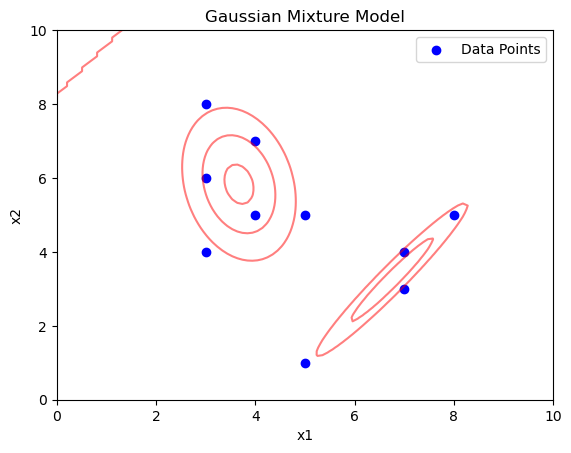

In [680]:
# Updated Mixing Coefficients (phi) and Means (mu)
phi = np.mean(responsibilities, axis=0)
mu = np.dot(responsibilities.T, x) / np.sum(responsibilities, axis=0)[:, np.newaxis]

# Updated Covariances (sigma)
sigma = []
for j in range(num_clusters):
    diff = x - mu[j]
    sigma_j = np.dot(responsibilities[:, j] * diff.T, diff) / np.sum(responsibilities[:, j])
    sigma.append(sigma_j)

# Plot data points
plt.scatter(x[:, 0], x[:, 1], c='b', label='Data Points')

# Plot Gaussian components
for j in range(num_clusters):
    rv = multivariate_normal(mean=mu[j], cov=sigma[j])
    x, y = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
    pos = np.dstack((x, y))
    plt.contour(x, y, rv.pdf(pos), colors='r', levels=3, alpha=0.5, label=f'Component {j + 1}')

plt.title('Gaussian Mixture Model')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()